**Introduction: Deep Learning for Fashion MNIST Classification in Google Colab**

Welcome to this hands-on deep learning project where we'll build and train a convolutional neural network (CNN) to classify fashion items from the Fashion MNIST dataset. This practical example demonstrates the complete machine learning workflow using Google Colab, making it accessible to anyone with a web browser and internet connection.

**Project Overview**

Fashion MNIST is a modern to the classic MNIST dataset, containing 70,000 grayscale images of 10 different clothing categories. Unlike handwritten digits, fashion items present a more challenging classification problem that better represents modern computer vision tasks.

**What You'll Learn**

* This project will guide you through:

* Setting up a GPU-accelerated environment in Google Colab

* Loading and visualizing image data

* Preprocessing data for neural networks

* Designing a CNN architecture with convolutional and pooling layers

* Training a deep learning model with validation

* Evaluating model performance and making predictions

* Interpreting results and visualizing predictions

In [1]:
# Check if GPU is available
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


**Step 1: Import Necessary Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

**Step 2: Load and Explore the Dataset**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


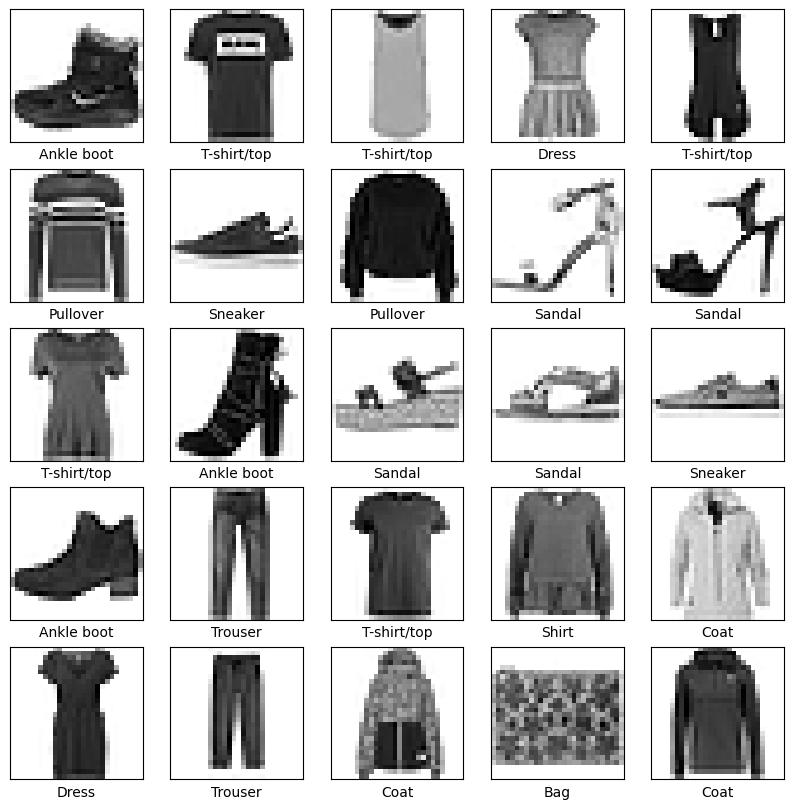

In [3]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Check dataset shape
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Define class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize some samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Step 3: Preprocess the Data**

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data to include channel dimension (required for CNN)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Reshaped training data:", x_train.shape)
print("One-hot labels shape:", y_train.shape)

Reshaped training data: (60000, 28, 28, 1)
One-hot labels shape: (60000, 10)


**Step 4: Build the Neural Network Model**

In [5]:
# Create a sequential model
model = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten feature maps
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting

    # Output layer with 10 units (one for each class)
    layers.Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Compile the Model**

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Step 6: Train the Model**

In [7]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2  # Use 20% of training data for validation
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.6480 - loss: 0.9831 - val_accuracy: 0.8421 - val_loss: 0.4283
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.8295 - loss: 0.4693 - val_accuracy: 0.8666 - val_loss: 0.3714
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.8565 - loss: 0.3977 - val_accuracy: 0.8792 - val_loss: 0.3241
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.8718 - loss: 0.3593 - val_accuracy: 0.8873 - val_loss: 0.3030
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.8784 - loss: 0.3263 - val_accuracy: 0.8915 - val_loss: 0.2990
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.8868 - loss: 0.3148 - val_accuracy: 0.8973 - val_loss: 0.2795
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.8904 - loss: 0.2993 - val_accuracy: 0.8983 - val_loss: 0.2679
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 106ms/step - accuracy: 0.8966 - loss: 0

Step 7: Evaluate Model Performance

313/313 - 5s - 17ms/step - accuracy: 0.8997 - loss: 0.2723

Test accuracy: 0.8997


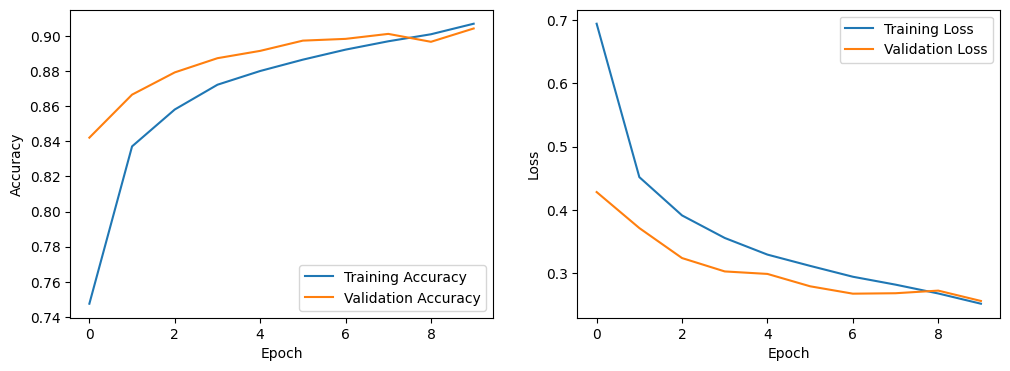

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Step 8: Make Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


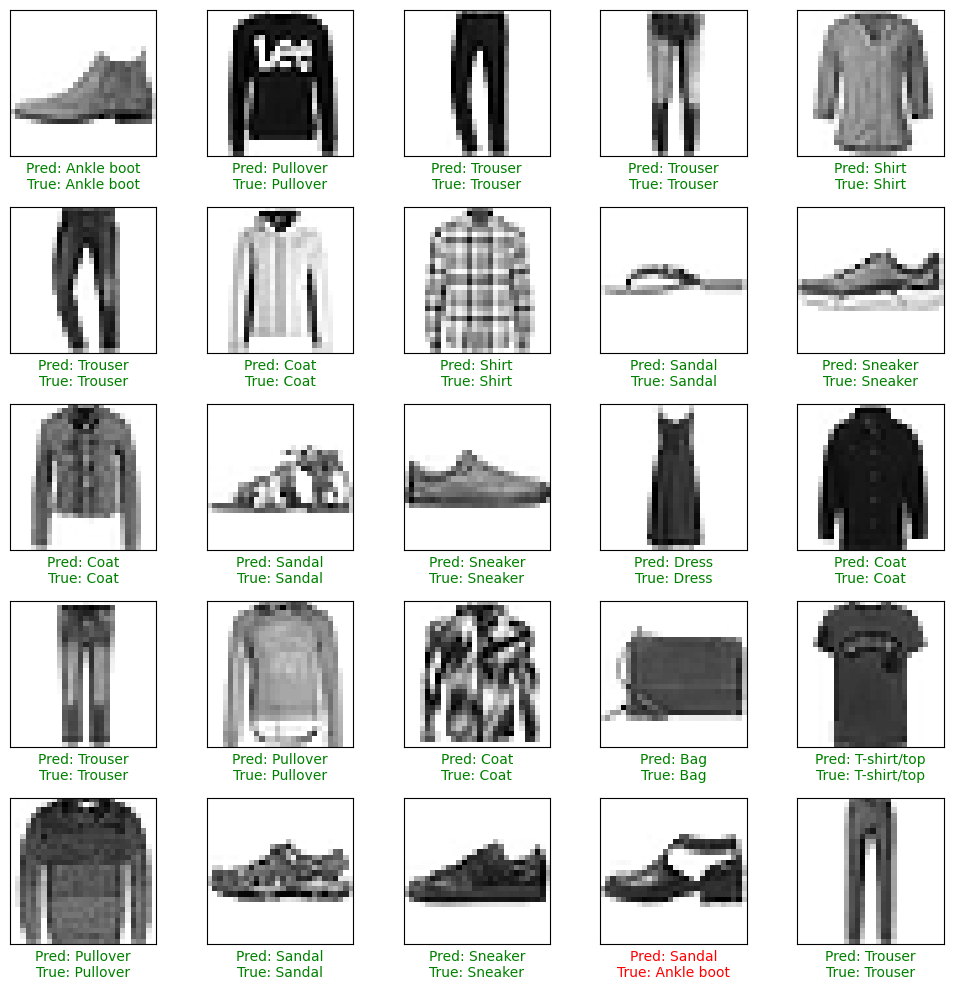

In [9]:
# Make predictions on test data
predictions = model.predict(x_test)

# Display some predictions with actual labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.tight_layout()
plt.show()

Step 9: Save the Model

In [13]:
# Save the trained model
model.save('fashion_mnist_model.h5')
print("Model saved successfully!")

# To load the model later:
# loaded_model = keras.models.load_model('fashion_mnist_model.h5')

Model saved successfully!
